* object - a container - <br>
**contains data (`lanaguage`, `version`)-> state -> attributes <br>
**                       contains functionality(`function` written) -> behavior -> methods <br>

* my_car - brand / model / year -> state
         accelerate / brake / steer -> behavior

* class have behavior -> they are callable
                       this returns an instance of the class
                       often called objects, differentiating from class

### Class Attributes

In [2]:
class MyClass:
    language ='Python'  #attribute
    version = '3.6'     #attribute

In [3]:
getattr(MyClass, 'language')

'Python'

In [4]:
#dot notation
MyClass.language

'Python'

In [5]:
setattr(MyClass, 'version', '3.7')
getattr(MyClass, 'version')

'3.7'

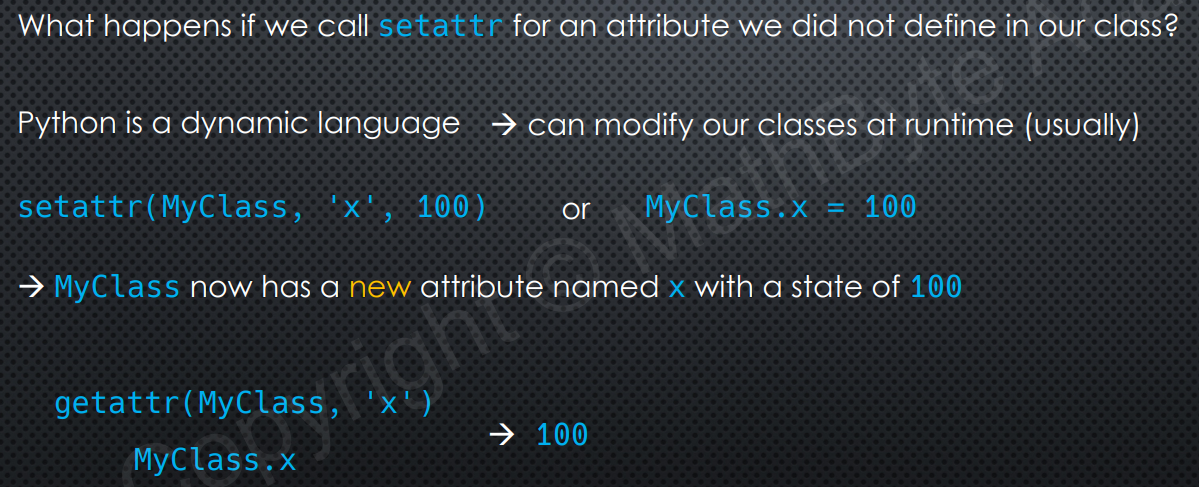

In [6]:
MyClass.__dict__

mappingproxy({'__module__': '__main__',
              'language': 'Python',
              'version': '3.7',
              '__dict__': <attribute '__dict__' of 'MyClass' objects>,
              '__weakref__': <attribute '__weakref__' of 'MyClass' objects>,
              '__doc__': None})

Not directly mutable dictionary (bur *setattr* can)

In [7]:
#Deleting an attribute
delattr(MyClass, 'version')
MyClass.__dict__

mappingproxy({'__module__': '__main__',
              'language': 'Python',
              '__dict__': <attribute '__dict__' of 'MyClass' objects>,
              '__weakref__': <attribute '__weakref__' of 'MyClass' objects>,
              '__doc__': None})

In [9]:
MyClass.version = 3.7

In [10]:
del MyClass.version

In [11]:
MyClass.__dict__

mappingproxy({'__module__': '__main__',
              'language': 'Python',
              '__dict__': <attribute '__dict__' of 'MyClass' objects>,
              '__weakref__': <attribute '__weakref__' of 'MyClass' objects>,
              '__doc__': None})

### Callable Class attributes

In [15]:
class MyClass:
    language ='Python'  #attribute
    version = '3.6'     #attribute

    def say_hello():
        print(f"hello from {MyClass.language}")

MyClass.say_hello()  #calling 

hello from Python


### Classes are callable

* When we call a class, a class instance object is create.
* The class instance object has its own namespace.
* Has its own __dict__, __class__

In [16]:
class Program:
    language ='Python'  #attribute
    version = '3.6'     #attribute

    def say_hello():
        print(f"hello from {MyClass.language}")

In [17]:
p = Program()
type(p)

__main__.Program

In [18]:
isinstance(p, Program)

True

In [19]:
p.__dict__

{}

In [20]:
Program.__dict__

mappingproxy({'__module__': '__main__',
              'language': 'Python',
              'version': '3.6',
              'say_hello': <function __main__.Program.say_hello()>,
              '__dict__': <attribute '__dict__' of 'Program' objects>,
              '__weakref__': <attribute '__weakref__' of 'Program' objects>,
              '__doc__': None})

In [21]:
type(p), p.__class__

(__main__.Program, __main__.Program)

### Data attributes

In [22]:
class Program:
    language ='Python'   # class attributes - common to all instances

my_obj = Program()

In [23]:
Program.__dict__, my_obj.__dict__

(mappingproxy({'__module__': '__main__',
               'language': 'Python',
               '__dict__': <attribute '__dict__' of 'Program' objects>,
               '__weakref__': <attribute '__weakref__' of 'Program' objects>,
               '__doc__': None}),
 {})

* instance created does have dict 

In [24]:
my_obj.language = 'java'  #instance attribute - specific to each instance

In [25]:
my_obj.language

'java'

In [27]:
class BankAccount:
    apr = 1.2
BankAccount.__dict__

mappingproxy({'__module__': '__main__',
              'apr': 1.2,
              '__dict__': <attribute '__dict__' of 'BankAccount' objects>,
              '__weakref__': <attribute '__weakref__' of 'BankAccount' objects>,
              '__doc__': None})

In [28]:
acc_1 = BankAccount()
acc_2 = BankAccount()

In [29]:
acc_1.__dict__, acc_2.__dict__

({}, {})

In [31]:
acc_1.apr, acc_2.apr

(1.2, 1.2)

### Functional attributes

In [1]:
class MyClass:
    def say_hello():
        print('hello')

my_obj = MyClass()

In [6]:
MyClass.say_hello, type(MyClass.say_hello)

(<function __main__.MyClass.say_hello()>, function)

In [3]:
my_obj.say_hello  #function attribute called from an instance of the class

<bound method MyClass.say_hello of <__main__.MyClass object at 0x00000184DA46C850>>

In [4]:
MyClass.say_hello()

hello


In [5]:
my_obj.say_hello()

TypeError: say_hello() takes 0 positional arguments but 1 was given

* say_hello is a method object
* it is bound to my_obj
* when my_obj.say_hello is called, the bound object my_obj is injected as the first parameter to the method say_hello

In [7]:
class Person:
    def say_hello(*args):
        print('say_hello args:', args)

In [8]:
Person.say_hello()

say_hello args: ()


In [9]:
p = Person()
hex(id(p))

'0x184db806cd0'

In [10]:
p.say_hello()

say_hello args: (<__main__.Person object at 0x00000184DB806CD0>,)


In [11]:
class Person:
    def set_name(instance_obj, new_name):
        instance_obj.name = new_name

In [12]:
p= Person()

In [13]:
p.set_name('Sneha')
p.__dict__

{'name': 'Sneha'}

In [14]:
class Person:
    def say_hello(self):
        print(f'{self} says hello')

In [15]:
Person.say_hello

<function __main__.Person.say_hello(self)>

In [16]:
p = Person()
p.say_hello

<bound method Person.say_hello of <__main__.Person object at 0x00000184DA5C1940>>

In [17]:
m_hello = p.say_hello
m_hello

<bound method Person.say_hello of <__main__.Person object at 0x00000184DA5C1940>>

In [18]:
m_hello.__func__

<function __main__.Person.say_hello(self)>

In [20]:
m_hello.__self__

### Initializing Class instance

In [1]:
class Person:
    def __init__(self): #Special method
        print(f"Initializing a new person object: {self}")

In [2]:
p = Person() #__init__ method is called automatically

Initializing a new person object: <__main__.Person object at 0x000002649F738A60>


In [3]:
class Person:
    def __init__(self, name): #Special method
        self.name = name

In [4]:
p = Person('Eric')

In [5]:
p.__dict__

{'name': 'Eric'}

### Creating attributes at runtime

### Properties

In [1]:
class MyClass:
    def __init__(self, language):
        self.language = language

obj = MyClass('python')
print(obj.language)    # Direct access to "language"
obj.language = 'Java'  # Bare attribute accessing 

python


In [6]:
class MyClass:
    def __init__(self, language):
        self._language = language   #private attribute is set

    def get_language(self):
        return self._language
    
    def set_language(self, value):
        self._language = value

m = MyClass('python')
m.language

AttributeError: 'MyClass' object has no attribute 'language'

In [5]:
m = MyClass('python')
m.get_language()

'python'

In [7]:
m.__dict__

{'_language': 'python'}

In [8]:
m.set_language('java')

In [9]:
m.__dict__

{'_language': 'java'}

In [13]:
# JAVA process where getter/setter method is used
class Person:
    def __init__(self, name):
        self.set_name = name
    
    def get_name(self):
        return self._name

    def set_name(self, value):
        if isinstance(value,str) and len(value.strip())>0:
            self._name =value.strip()
        else:
            raise ValueError('name must be a non empty string')

In [14]:
p = Person('sneha')

In [18]:
try:
    p.set_name('')
except ValueError as ex:
    print(ex)

TypeError: 'str' object is not callable

In [19]:
try:
    p = Person('')
except ValueError as ex:
    print(ex)

In [20]:
class Person:
    def __init__(self, name):
        self._name = name
    
    def get_name(self):
        return self._name

    def set_name(self, value):
        if isinstance(value,str) and len(value.strip())>0:
            self._name =value.strip()
        else:
            raise ValueError('name must be a non empty string')
    
    name = property(fget= get_name, fset=set_name)

    

In [21]:
p = Person('Sneha')

In [22]:
p.name  #property object

'Sneha'

In [23]:
p.name = 'vardhan'

In [24]:
try:
    p.name = None
except ValueError as ex:
    print(ex)

name must be a non empty string


In [25]:
p.__dict__

{'_name': 'vardhan'}

In [27]:
Person.__dict__

mappingproxy({'__module__': '__main__',
              '__init__': <function __main__.Person.__init__(self, name)>,
              'get_name': <function __main__.Person.get_name(self)>,
              'set_name': <function __main__.Person.set_name(self, value)>,
              'name': <property at 0x18c2138b770>,
              '__dict__': <attribute '__dict__' of 'Person' objects>,
              '__weakref__': <attribute '__weakref__' of 'Person' objects>,
              '__doc__': None})

In [28]:
p = Person('alex')

In [29]:
p.name

'alex'

### Property Decorators

In [1]:
p = property(lambda self: print('getting property..'))

In [2]:
p

In [3]:
property.__dict__

mappingproxy({'__getattribute__': <slot wrapper '__getattribute__' of 'property' objects>,
              '__get__': <slot wrapper '__get__' of 'property' objects>,
              '__set__': <slot wrapper '__set__' of 'property' objects>,
              '__delete__': <slot wrapper '__delete__' of 'property' objects>,
              '__init__': <slot wrapper '__init__' of 'property' objects>,
              '__new__': <function property.__new__(*args, **kwargs)>,
              'getter': <method 'getter' of 'property' objects>,
              'setter': <method 'setter' of 'property' objects>,
              'deleter': <method 'deleter' of 'property' objects>,
              'fget': <member 'fget' of 'property' objects>,
              'fset': <member 'fset' of 'property' objects>,
              'fdel': <member 'fdel' of 'property' objects>,
              '__doc__': <member '__doc__' of 'property' objects>,
              '__isabstractmethod__': <attribute '__isabstractmethod__' of 'property' objec

In [4]:
p.fget

<function __main__.<lambda>(self)>

In [5]:
### decorators
def my_decorator(fn):
    print('decorating a function')
    def inner(*args, **kwargs):
        print('running decorated function')
        return fn(*args, **kwargs)
    return inner

In [11]:
def undecorated_function(a, b):
    print('running original func')
    return a + b

In [15]:
decorated_func = my_decorator(undecorated_function)

decorating a function


In [16]:
decorated_func(1,2)

TypeError: 'NoneType' object is not callable

In [22]:
class Person:
    def __init__(self, name):
        self._name = name
        
    def name(self):
        return self._name
        
    name = property(name)

In [23]:
p = Person('vardhan')
p.name


'vardhan'

In [17]:
class Person:
    def __init__(self, name):
        self._name = name
        
    @property
    def name(self):
        print(self._name)

In [19]:
p = Person('sneha')
p.name = 'varhdan'

AttributeError: can't set attribute